In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 데이터 불러오기
kospi_df = pd.read_csv('./data/Kospi 50 Historical Data.csv')
usd_krw_df = pd.read_csv('./data/USD_KRW Historical Data.csv')
btc_df = pd.read_csv('./data/BTC_USD Bitfinex Historical data.csv')


In [4]:
btc_df.info()

# 'Vol.' 열 삭제
btc_df = btc_df.drop(columns=['Vol.'])

btc_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4665 entries, 0 to 4664
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      4665 non-null   object
 1   Price     4665 non-null   object
 2   Open      4665 non-null   object
 3   High      4665 non-null   object
 4   Low       4665 non-null   object
 5   Vol.      4069 non-null   object
 6   Change %  4665 non-null   object
dtypes: object(7)
memory usage: 255.2+ KB


,Date,Price,Open,High,Low,Change %
0,01/16/2025,"99,748.0","100,490.0","100,790.0","99,134.0",-0.74%
1,01/15/2025,"100,490.0","96,701.0","100,660.0","96,664.0",3.92%
2,01/14/2025,"96,701.0","94,682.0","97,451.0","94,492.0",2.13%
3,01/13/2025,"94,682.0","94,574.0","95,967.0","89,939.0",0.11%
4,01/12/2025,"94,574.0","94,716.0","95,511.0","93,835.0",-0.15%
...,...,...,...,...,...,...
4660,04/10/2012,4.8,4.8,4.8,4.8,0.00%
4661,04/09/2012,4.9,4.9,4.9,4.9,1.67%
4662,04/08/2012,4.8,4.8,4.8,4.8,2.13%
4663,04/07/2012,4.7,4.7,4.7,4.7,-5.25%


In [5]:
# 데이터 필요 없는 부분 제거

if btc_df['High'].dtype == 'object':
    btc_df['High'] = btc_df['High'].str.replace(',', '').astype(float).astype(int)

if btc_df['Low'].dtype == 'object':
    btc_df['Low'] = btc_df['Low'].str.replace(',', '').astype(float).astype(int)

if btc_df['Price'].dtype == 'object':
    btc_df['Price'] = btc_df['Price'].str.replace(',', '').astype(float).astype(int)

if btc_df['Open'].dtype == 'object':
    btc_df['Open'] = btc_df['Open'].str.replace(',', '').astype(float).astype(int)


print(btc_df.head())


         Date   Price    Open    High    Low Change %
0  01/16/2025   99748  100490  100790  99134   -0.74%
1  01/15/2025  100490   96701  100660  96664    3.92%
2  01/14/2025   96701   94682   97451  94492    2.13%
3  01/13/2025   94682   94574   95967  89939    0.11%
4  01/12/2025   94574   94716   95511  93835   -0.15%


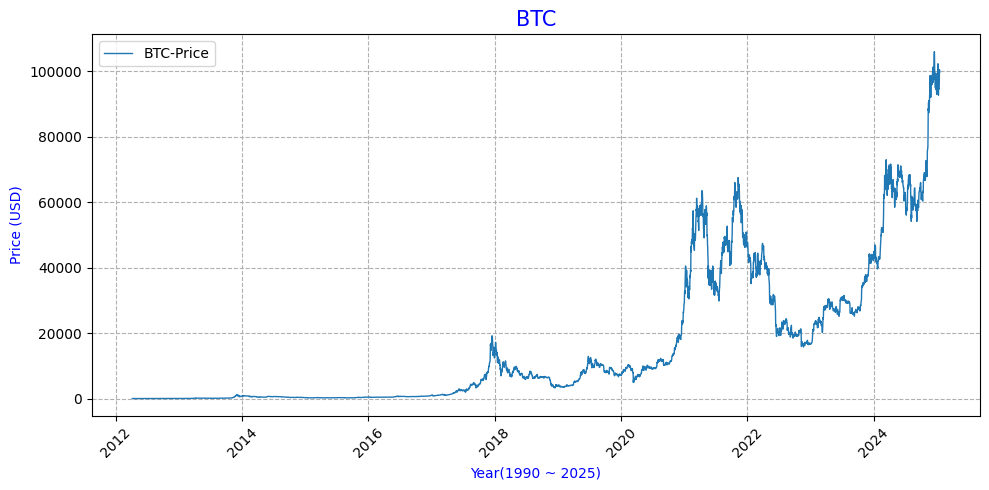

In [65]:
# Date 열을 datetime 형식으로 변환
btc_df['Date'] = pd.to_datetime(btc_df['Date'])

# High와 Low의 평균값 계산
btc_df['Avg'] = (btc_df['High'] + btc_df['Low']) / 2

# 날짜 기준으로 데이터 정렬
df2 = btc_df.sort_values('Date')

# 차트 생성
plt.figure(figsize=(10, 5))
plt.plot(df2['Date'], df2['Price'], label='BTC-Price', linestyle='-', linewidth=1)

plt.title('BTC', fontsize=15,color = 'Blue')
plt.xlabel('Year(1990 ~ 2025)', fontsize=10, color = 'BLUE')
plt.ylabel('Price (USD)', fontsize=10, color = 'BLUE')
plt.legend(fontsize=10)
plt.grid(linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---

USD_KRW

In [7]:
usd_krw_df

,Date,Price,Open,High,Low,Vol.,Change %
0,01/01/2025,"1,455.15","1,473.68","1,478.43","1,442.35",NaN,-1.46%
1,12/01/2024,"1,476.78","1,395.96","1,487.37","1,395.52",NaN,5.89%
2,11/01/2024,"1,394.67","1,373.79","1,411.95","1,368.59",NaN,1.61%
3,10/01/2024,"1,372.58","1,317.55","1,394.18","1,315.57",NaN,4.22%
4,09/01/2024,"1,317.01","1,337.57","1,348.53","1,302.94",NaN,-1.46%
...,...,...,...,...,...,...,...
415,06/01/1990,716.05,716.05,717.05,711.35,NaN,0.67%
416,05/01/1990,711.25,711.25,711.25,711.25,NaN,0.20%
417,04/01/1990,709.80,709.80,709.80,709.80,NaN,0.87%
418,03/01/1990,703.70,703.70,703.70,703.70,NaN,1.00%


In [8]:
usd_krw_df['Date'] = pd.to_datetime(usd_krw_df['Date'])

# 데이터 필요 없는 부분 제거
if usd_krw_df['High'].dtype == 'object':
    usd_krw_df['High'] = usd_krw_df['High'].str.replace(',', '').astype(float).astype(int)

if usd_krw_df['Low'].dtype == 'object':
    usd_krw_df['Low'] = usd_krw_df['Low'].str.replace(',', '').astype(float).astype(int)

if usd_krw_df['Price'].dtype == 'object':
    usd_krw_df['Price'] = usd_krw_df['Price'].str.replace(',', '').astype(float).astype(int)

if usd_krw_df['Open'].dtype == 'object':
    usd_krw_df['Open'] = usd_krw_df['Open'].str.replace(',', '').astype(float).astype(int)

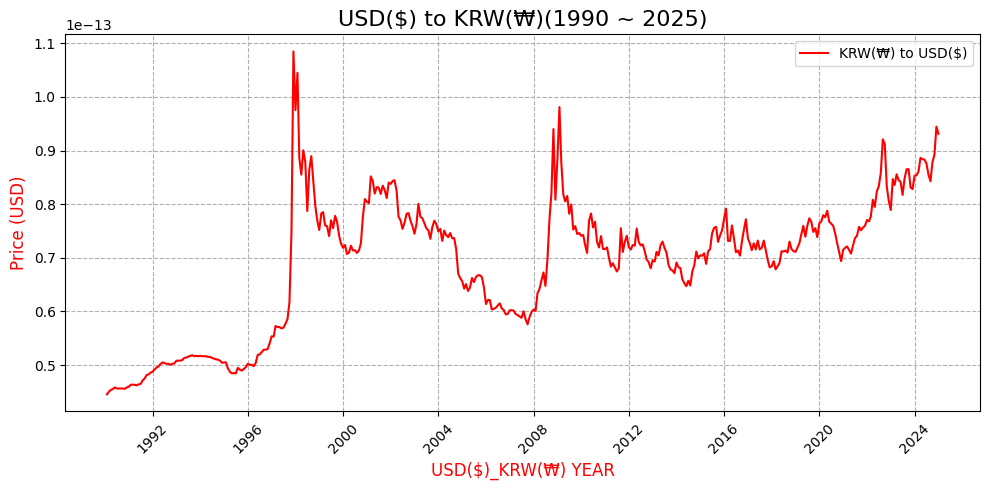

In [58]:
# High와 Low의 평균
usd_krw_df['Avg'] = (usd_krw_df['High'] + usd_krw_df['Low']) / 2

usd_krw_df['Price'] = usd_krw_df['Price'] / 500

# 날짜 기준으로 데이터 정렬
df = usd_krw_df.sort_values('Date')

# 차트 생성
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Price'], label='KRW(₩) to USD($)', linestyle='-', linewidth= 1.5, color = 'red')


# 시각적 요소 개선
plt.title('USD($) to KRW(₩)(1990 ~ 2025)', fontsize =16)
plt.xlabel('USD($)_KRW(₩) YEAR', fontsize=12, color = 'red') 
plt.ylabel('Price (USD)', fontsize=12, color = 'red')
plt.legend(fontsize=10)
plt.grid(linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()

# 차트 출력
plt.show()

---

KOSPI DATA

In [10]:
kospi_df

,Date,Price,Open,High,Low,Vol.,Change %
0,01/01/2025,"2,336.56","2,210.44","2,363.58","2,193.71",599.58M,5.57%
1,12/01/2024,"2,213.32","2,291.72","2,325.58","2,195.90",1.24B,-2.47%
2,11/01/2024,"2,269.46","2,333.98","2,389.52","2,190.40",1.39B,-3.20%
3,10/01/2024,"2,344.58","2,358.12","2,438.43","2,344.58",1.30B,-1.70%
4,09/01/2024,"2,385.16","2,504.14","2,517.30","2,299.68",1.20B,-4.48%
...,...,...,...,...,...,...,...
252,01/01/2004,805.18,756.35,831.15,754.15,2.01M,7.17%
253,12/01/2003,751.31,744.69,765.08,715.06,2.18M,0.80%
254,11/01/2003,745.36,737.71,769.44,702.28,2.26M,1.12%
255,10/01/2003,737.13,643.01,750.47,641.01,2.60M,13.55%


In [11]:
kospi_df.drop(columns=['Vol.'])
kospi_df['Date'] = pd.to_datetime(kospi_df['Date'])

In [12]:
# 데이터 필요 없는 부분 제거
if kospi_df['High'].dtype == 'object':
    kospi_df['High'] = kospi_df['High'].str.replace(',', '').astype(float).astype(int)

if kospi_df['Low'].dtype == 'object':
    kospi_df['Low'] = kospi_df['Low'].str.replace(',', '').astype(float).astype(int)

if kospi_df['Price'].dtype == 'object':
    kospi_df['Price'] = kospi_df['Price'].str.replace(',', '').astype(float).astype(int)

if kospi_df['Open'].dtype == 'object':
    kospi_df['Open'] = kospi_df['Open'].str.replace(',', '').astype(float).astype(int)

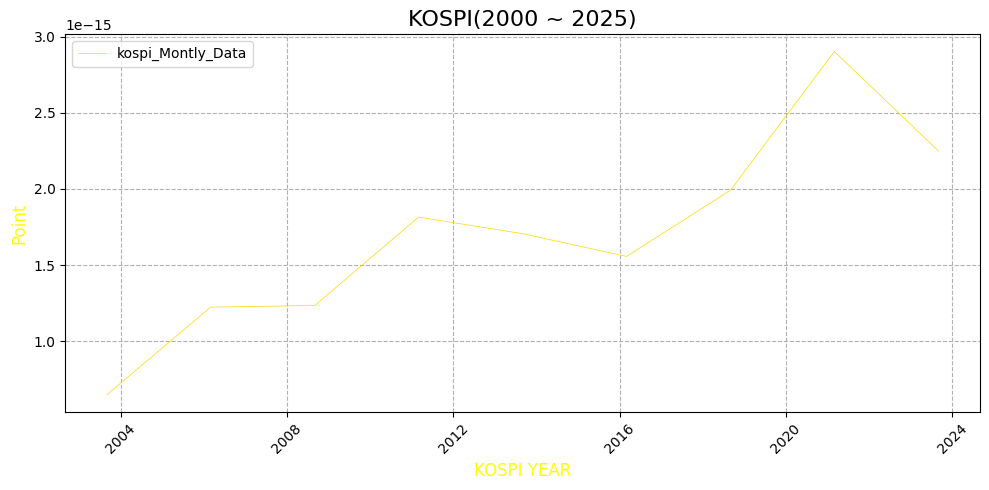

In [62]:
# High와 Low의 평균
kospi_df['Avg'] = (kospi_df['High'] + kospi_df['Low']) / 2

kospi_df['Price'] = kospi_df['Price'] / 1000


# 날짜 기준으로 데이터 정렬
df = kospi_df.sort_values('Date')

# 너무 갯수가 많아서 보기 불편 하기에 표현 개수 조절
sampled_df = df.iloc[::30]
# 차트 생성
plt.figure(figsize=(10, 5))
plt.plot(sampled_df['Date'], sampled_df['Price'], label='kospi_Montly_Data', linestyle='-', linewidth= 0.5, color = 'gold')


# 시각적 요소 개선
plt.title('KOSPI(2000 ~ 2025)', fontsize =16)
plt.xlabel('KOSPI YEAR', fontsize=12, color = 'YELLOW') 
plt.ylabel('Point', fontsize=12, color = 'YELLOW')
plt.legend(fontsize=10)
plt.grid(linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()

# 차트 출력
plt.show()

### USD, BTC, KOSPI 통합 시각화

In [23]:
# 날짜 Date 조절

common_start_date = max(usd_krw_df['Date'].min(), btc_df['Date'].min(), kospi_df['Date'].min())
common_end_date = min(usd_krw_df['Date'].max(), btc_df['Date'].max(), kospi_df['Date'].max())

BTC_common = btc_df[(btc_df['Date'] >= common_start_date) & (btc_df['Date'] <= common_end_date)]
USD_common = usd_krw_df[(usd_krw_df['Date'] >= common_start_date) & (usd_krw_df['Date'] <= common_end_date)]
KOSPI_common = kospi_df[(kospi_df['Date'] >= common_start_date) & (kospi_df['Date'] <= common_end_date)]


C:\Users\Playdata\AppData\Local\Temp\ipykernel_29368\4210260573.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BTC_common['Year'] = BTC_common['Date'].dt.year
C:\Users\Playdata\AppData\Local\Temp\ipykernel_29368\4210260573.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  USD_common['Year'] = USD_common['Date'].dt.year
C:\Users\Playdata\AppData\Local\Temp\ipykernel_29368\4210260573.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

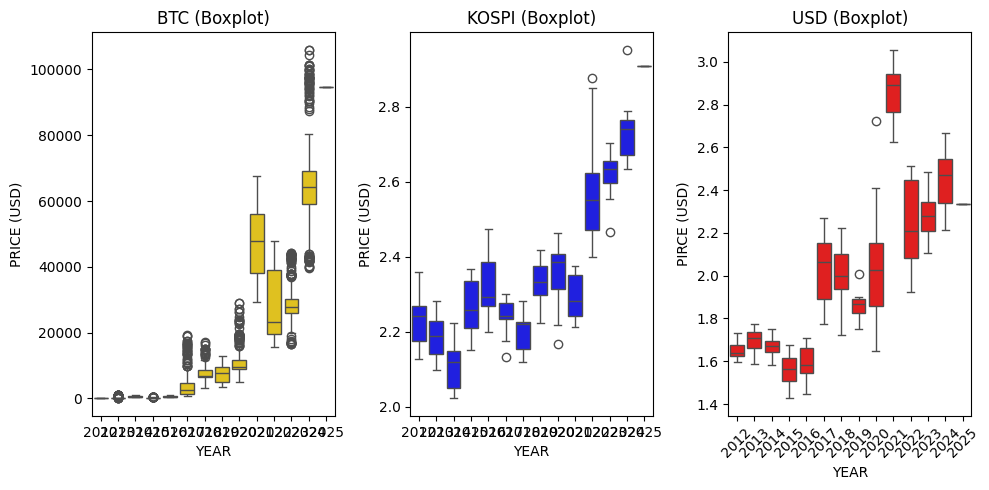

In [63]:
# 데이터 탐색
BTC_common['Year'] = BTC_common['Date'].dt.year
USD_common['Year'] = USD_common['Date'].dt.year
KOSPI_common['Year'] = KOSPI_common['Date'].dt.year

# 상자 그림 시각화
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

#BTC
sns.boxplot(data=BTC_common, x='Year', y='Price', ax=axes[0], color='gold')
axes[0].set_title('BTC (Boxplot)')
axes[0].set_xlabel('YEAR')
axes[0].set_ylabel('PRICE (USD)')
plt.xticks(rotation=45)
plt.tight_layout()

#USD
sns.boxplot(data=USD_common, x='Year', y='Price', ax=axes[1], color='blue')
axes[2].set_title('USD (Boxplot)')
axes[2].set_xlabel('YEAR')
axes[2].set_ylabel('PIRCE (USD)')
plt.xticks(rotation=45)
plt.tight_layout()

#KOSPI
sns.boxplot(data=KOSPI_common, x='Year', y='Price', ax=axes[2], color='red')
axes[1].set_title('KOSPI (Boxplot)')
axes[1].set_xlabel('YEAR')
axes[1].set_ylabel('PRICE (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

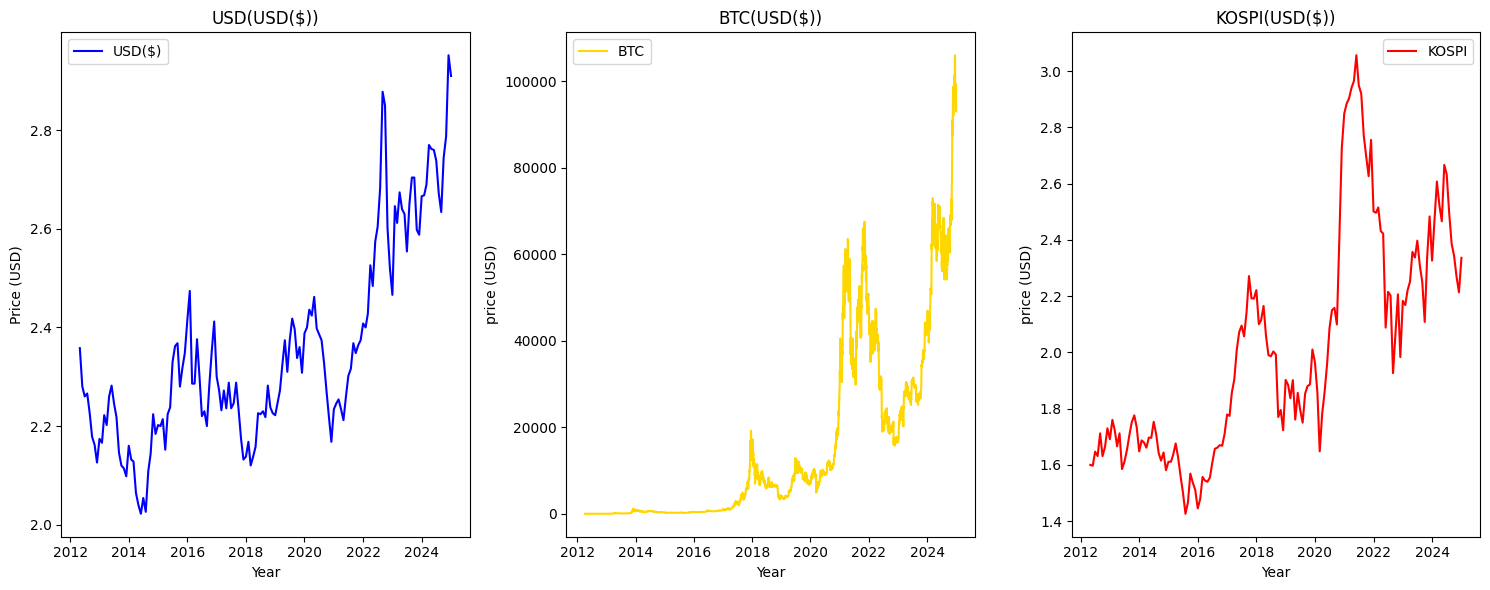

In [66]:
# 통합 2 (같은 기간 동안의 변동 추의)

fig, axes = plt.subplots(1, 3, figsize=(15, 6))

axes[0].plot(USD_common['Date'], USD_common['Price'], label='USD($)', color='BLUE')
axes[0].set_title('USD(USD($))')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Price (USD)')
axes[0].legend()

axes[1].plot(BTC_common['Date'], BTC_common['Price'], label='BTC', color='GOLD')
axes[1].set_title('BTC(USD($))')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('price (USD)')
axes[1].legend()

axes[2].plot(KOSPI_common['Date'], KOSPI_common['Price'], label='KOSPI', color='RED')
axes[2].set_title('KOSPI(USD($))')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('price (USD)')
axes[2].legend()


plt.tight_layout()
plt.show()